In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [2]:
print(tf. __version__)

2.18.0


In [3]:
dataset_path = r"C:\Users\91902\Downloads\internship_PotatoLeaf\Dataset"

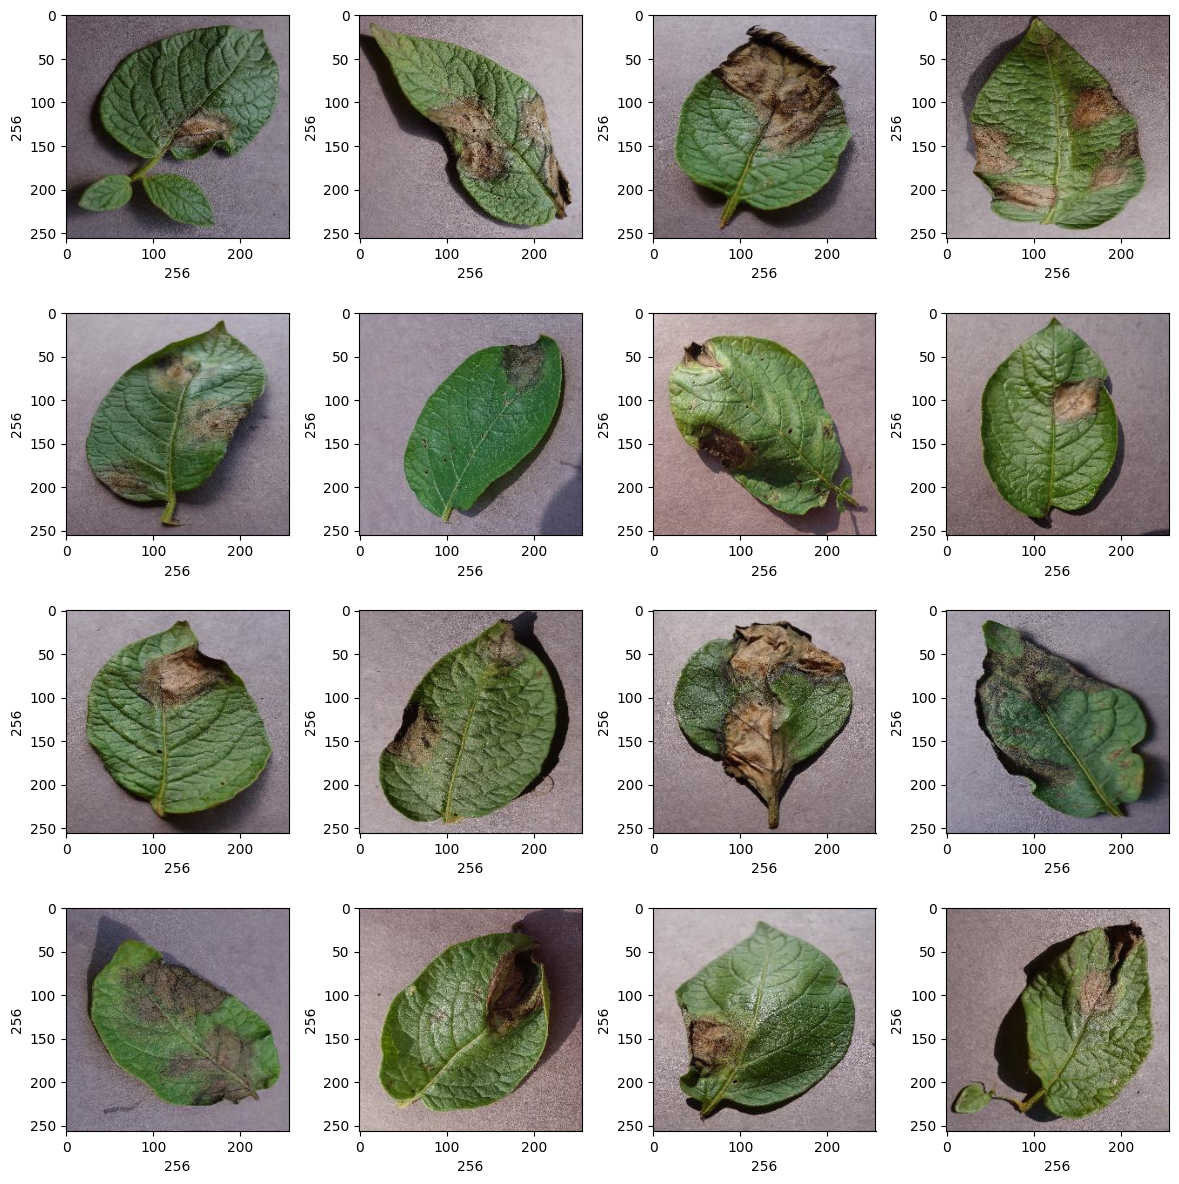

In [5]:
plt.figure(figsize = (12, 12))
dataset_path = r"C:\Users\91902\Downloads\internship_PotatoLeaf\Dataset\Potato___Late_blight"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(dataset_path +'/'+ random.choice(sorted(os.listdir(dataset_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

In [7]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [8]:
dataset_path = r"C:\Users\91902\Downloads\internship_PotatoLeaf\Dataset"
labels = os.listdir(dataset_path)

print(labels)

['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']


In [9]:
dataset_path = r"C:\Users\91902\Downloads\internship_PotatoLeaf\Dataset"
root_dir = listdir(dataset_path)
image_list, label_list = [], []
all_labels = [ 'Potato-Early_blight', 'Potato_Late_blight','Potato_healthy']
binary_labels = [0, 1, 2]
temp = -1

# Reading and converting image to numpy array

for directory in root_dir:
  plant_image_list = listdir(f"{dataset_path}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dataset_path}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [10]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0
0    1000
2    1000
1     152
Name: count, dtype: int64

In [11]:
image_list[0].shape

(256, 256, 3)

In [12]:
label_list = np.array(label_list)
label_list.shape

(2152,)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [14]:
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same",input_shape = (256, 256, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

C:\Users\91902\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [19]:
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 31s 2s/step - accuracy: 0.3412 - loss: 1.0303 - val_accuracy: 0.4783 - val_loss: 0.8673
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.5810 - loss: 0.8895 - val_accuracy: 0.6261 - val_loss: 0.8450
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6598 - loss: 0.8690 - val_accuracy: 0.6957 - val_loss: 0.8070
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6497 - loss: 0.8035 - val_accuracy: 0.8319 - val_loss: 0.7643
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.7710 - loss: 0.7642 - val_accuracy: 0.8377 - val_loss: 0.7049
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8069 - loss: 0.7328 - val_accuracy: 0.8406 - val_loss: 0.6415
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.8378 - loss: 0.6333 - val_accuracy: 0.8145 - val_loss: 0.5809
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step - accuracy: 0.8263 - loss: 0.5918 - val_accuracy: 0.8667 - val_loss:

In [20]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [49]:
model.save(r"C:\Users\91902\Downloads\internship_PotatoLeaf\plant_disease_model.h5")

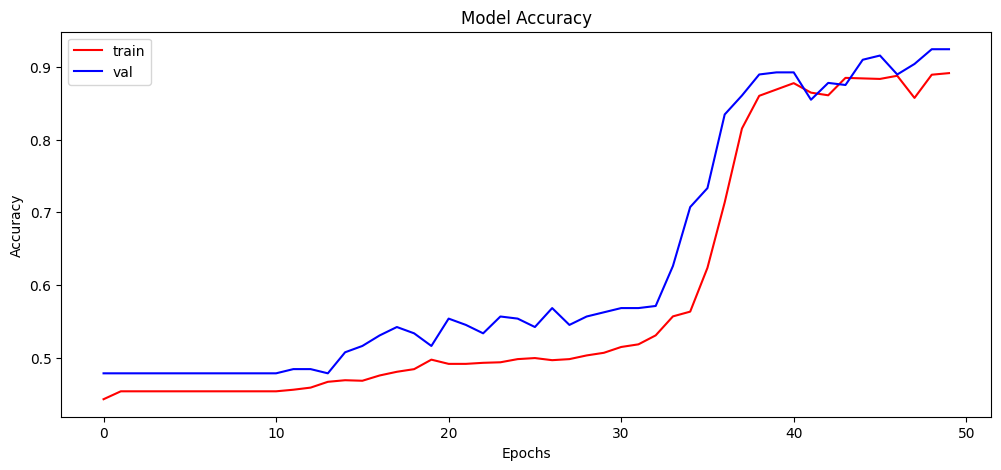

In [50]:
plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()

In [51]:
print("Calculating model accuracy")

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.8933 - loss: 0.3896
Test Accuracy: 90.02320170402527


In [52]:
y_pred = model.predict(x_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step


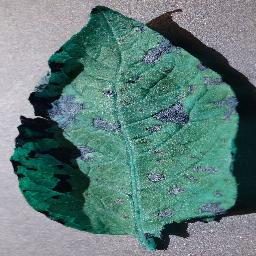

In [53]:
img = array_to_img(x_test[330])
img

In [54]:
print("Originally : ", all_labels[np.argmax(y_test[350])])
print("Predicted : ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Originally :  Potato-Early_blight
Predicted :  Potato-Early_blight
[0.42070055 0.01239234 0.5669072 ]


In [55]:
for i in range(50):
    print (all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred [12])])

Potato_healthy   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato_healthy   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato_healthy   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato_healthy   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato_healthy   Potato_healthy
Potato_Late_blight   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato_healthy   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato_healthy   Potato_healthy
Potato_healthy   Potato_healthy
Potato_healthy   Potato_healthy
Potato_healthy   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato_healthy   Potato_healthy
Potato_healthy   Potato_healthy
Potato_healthy   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato-Early_blight   Potato_healthy
Potato_healthy   Potato_health

In [ ]:
import numpy as np
import os
import cv2
from keras.models import load_model
from keras.preprocessing.image import img_to_array

# Define class labels
all_labels = ['Potato_Early_blight', 'Potato_Late_blight', 'Potato_healthy']

# Load the trained model
model_path = r"C:\Users\91902\Downloads\internship_PotatoLeaf\plant_disease_model.h5"
try:
    model = load_model(model_path)
    print("Model loaded successfully.")
except Exception as e:
    print(f"Error loading the model: {e}")
    exit()

# Function to preprocess the image
def preprocess_image(image_path):
    try:
        # Read and resize the image
        image = cv2.imread(image_path)
        if image is None:
            print("Error: Unable to read the image. Check the file path.")
            return None
        image = cv2.resize(image, (256, 256))  # Resize to 256x256 as per the model input
        image = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1]
        image = np.expand_dims(image, axis=0)  # Add batch dimension (1, 256, 256, 3)
        return image
    except Exception as e:
        print(f"Error processing image: {e}")
        return None

# Main function
def main():
    print("Welcome to the Potato Leaf Disease Detection Program!")
    while True:
        print("\nMenu:")
        print("1. Predict disease from an image")
        print("2. Exit")
        choice = input("Enter your choice: ").strip()

        if choice == "1":
            # Get the image path from the user
            image_path = input("Enter the full path of the image file: ").strip()
            if not os.path.exists(image_path):
                print("Error: The file does not exist. Please try again.")
                continue

            # Preprocess the image
            processed_image = preprocess_image(image_path)
            if processed_image is None:
                continue

            # Make predictions
            try:
                prediction = model.predict(processed_image, verbose=0)
                predicted_class = np.argmax(prediction)
                confidence = np.max(prediction) * 100

                # Display results
                print(f"\nPrediction: {all_labels[predicted_class]}")
                print(f"Confidence: {confidence:.2f}%")
            except Exception as e:
                print(f"Error during prediction: {e}")
                continue

        elif choice == "2":
            print("Exiting the program. Goodbye!")
            break

        else:
            print("Invalid choice. Please try again.")

# Run the main function
if __name__ == "__main__":
    main()


Model loaded successfully.
Welcome to the Potato Leaf Disease Detection Program!

Menu:
1. Predict disease from an image
2. Exit

Prediction: Potato_healthy
Confidence: 63.23%

Menu:
1. Predict disease from an image
2. Exit

Prediction: Potato_Early_blight
Confidence: 92.50%

Menu:
1. Predict disease from an image
2. Exit
Invalid choice. Please try again.

Menu:
1. Predict disease from an image
2. Exit
Invalid choice. Please try again.

Menu:
1. Predict disease from an image
2. Exit
Invalid choice. Please try again.

Menu:
1. Predict disease from an image
2. Exit
Invalid choice. Please try again.

Menu:
1. Predict disease from an image
2. Exit
Invalid choice. Please try again.

Menu:
1. Predict disease from an image
2. Exit
Invalid choice. Please try again.

Menu:
1. Predict disease from an image
2. Exit
Invalid choice. Please try again.

Menu:
1. Predict disease from an image
2. Exit
Invalid choice. Please try again.

Menu:
1. Predict disease from an image
2. Exit
Invalid choice. Plea